In [163]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
dpe = DPE('COM3')

Running <function DPE.init_dut at 0x0000021FC6FADEE8> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.03s
Serial disconnected


In [79]:
dpe.set_clock(50)

Running <function DPE.set_clock at 0x0000021FC6FB8168> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


Running <function DPE.read at 0x0000021FC6FB8288> with serial
[INFO] Elapsed time = 0.63s
Serial disconnected


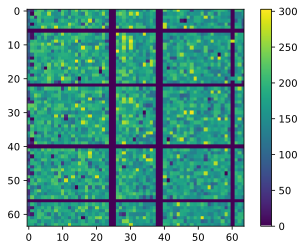

In [82]:
g = dpe.read(2)
plt.imshow(g * 1e6)
plt.colorbar()

Running <function DPE.read at 0x0000026B6C567318> with serial
[INFO] Elapsed time = 0.86s
Serial disconnected


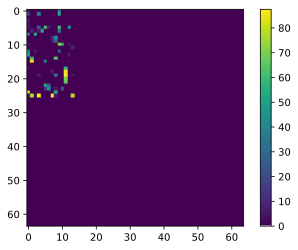

In [8]:
g = dpe.read(2)
plt.imshow(g * 1e6)
plt.colorbar()

5.00-

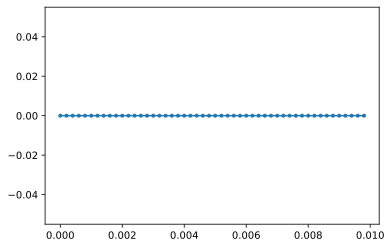

In [10]:
ar=0
r=20
c=12

Vreads = np.arange(0, 0.01, 0.0002)
Vgates = [5]

volts_set = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
#     dpe.a0.dut.vrefs_defaults()
#     dpe.a0.dut.dac_set('DAC_VREF_HI_CMP', 4.0)
    for Vgate in Vgates:
        print(f'{Vgate:.2f}', end='-')
        volts = []
        for vread in Vreads:
            volts.append( dpe.a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=4, Tsh=100) )
        volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')

5.00-

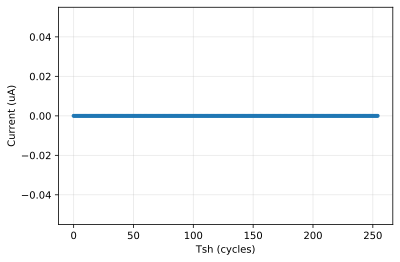

In [11]:
ar=0
r=55
c=2

Tsh_list = np.arange(255)
Vgates = [5]
Vread = 0.001

volts_set = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    for Vgate in Vgates:
        print(f'{Vgate:.2f}', end='-')
        volts = []
        for Tsh in Tsh_list:
            volts.append( dpe.a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=4, Tsh=Tsh) )
        volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Tsh_list, [i* 1e6 for i in volts], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

In [121]:
0x0c

12

Running <function DPE.read at 0x0F9A8F18> with serial
[INFO] Elapsed time = 0.26s
Serial disconnected


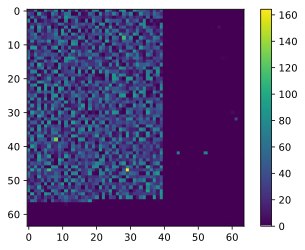

In [127]:
g = dpe.read(2)
plt.imshow(g * 1e6)
plt.colorbar()

In [164]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

In [165]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


In [24]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


5.00-

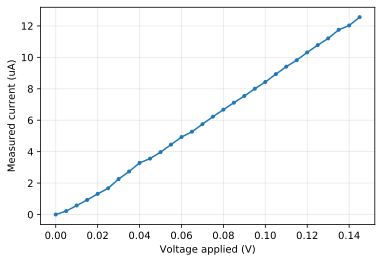

In [25]:
ar=2
r=0
c=2

Vreads = np.arange(0, 0.15, 0.005)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Voltage applied (V)')
plt.ylabel('Measured current (uA)')
plt.grid(arr = 2
rr = 3
cc = 2
Vreads = np.arange(0,0.45,0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
rdCurrsBatch = []

for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1 ))
    IMatrix = a0.pic_read_batch(arr, Vread=vRead, gain=-1)
    rdCurrsBatch.append(IMatrix[rr,cc])

fg, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('PIC READ Single Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PIC Batch Read Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrsBatch], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show(), alpha=0.3)
# plt.ylim(-0.1, 6)

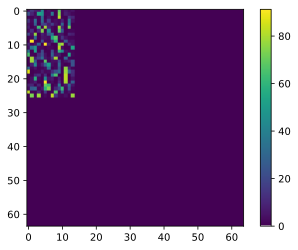

In [26]:
arr = 2
numRows = 64
numCols = 64
vRead = 0.2
Vgate = 5.0
Gmap22 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                    
            Gmap22[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap22)
plt.colorbar()

In [15]:
dut.disconnect()

Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.47s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial


c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


[INFO] Elapsed time = 0.45s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.47s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.45s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.45s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.44s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.48s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.47s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.

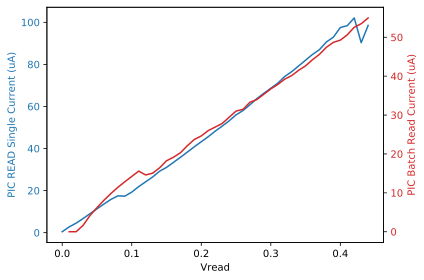

In [130]:
arr = 2
rr = 3
cc = 2
Vreads = np.arange(0,0.45,0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
rdCurrsBatch = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    a0 = dpe.a0
    for vRead in Vreads:
        rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1 ))
#         IMatrix = a0.pic_read_batch(arr, Vread=vRead, gain=-1)
#         rdCurrsBatch.append(IMatrix[rr,cc])

dpe.N_BIT = 1
vectors = np.eye(64)

for vRead in Vreads:
    IMatrix = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead
    rdCurrsBatch.append(IMatrix[rr,cc])
    

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('PIC READ Single Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PIC Batch Read Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrsBatch], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [129]:
dpe.N_BIT = 1
vRead = 0.2

vectorEye = np.eye(64)
#vectors = vectorEye[:,rr:(rr+1)]
vectors = vectorEye[:,rr]

data = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead
print(np.shape(data))
print(data)

Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial


TypeError: 'numpy.uint32' object is not iterable

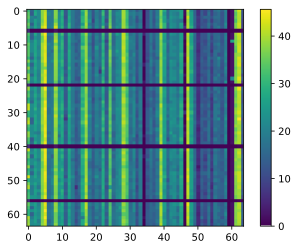

In [68]:
plt.imshow(data*1e6)
plt.colorbar()

In [119]:
#vector = [0x1<<i for i in range(64)]
row = 4
vector = [0x1<<row]
print(vector)

[16]


Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.47s
Serial disconnected


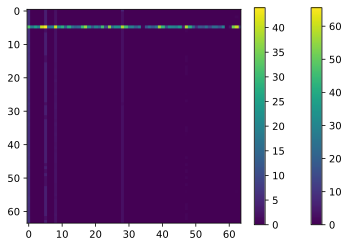

In [111]:
arr = 2
rr = 5
cc = 0
Vreads = np.arange(0,0.45,0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
rdCurrsBatch = []
singleReadImage = np.zeros((64,64))

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    a0 = dpe.a0
    for col in range(64):
        rdCurrs.append(a0.pic_read_single(arr, rr, col, Vread=vRead, Vgate=Vgate, gain=-1 ))
        
singleReadImage[rr,:] = rdCurrs
plt.imshow(singleReadImage*1e6)
plt.colorbar()

      
dpe.N_BIT = 1
#vectors = np.eye(64)
vectors = np.eye(64) - np.eye(64)
vectors[rr,rr] = 1
vRead = 0.2
Vgate = 5
#IMatrix = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead
IMatrix = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead

plt.imshow(IMatrix*1e6)
plt.colorbar()

Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial


c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


[INFO] Elapsed time = 0.43s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.47s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.45s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.48s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.46s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.

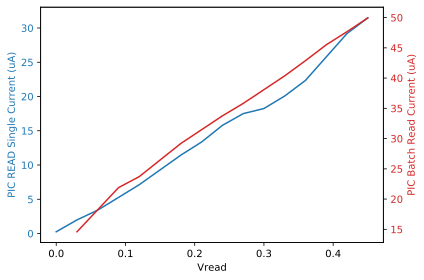

In [115]:
arr = 2
rr = 0
cc = 0
Vreads = np.arange(0,0.45,0.03)
Vgate = 5
Vref = 0.5
rdCurrs = []
rdCurrsBatch = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    a0 = dpe.a0
    for vRead in Vreads:
        rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1 ))
#         IMatrix = a0.pic_read_batch(arr, Vread=vRead, gain=-1)
#         rdCurrsBatch.append(IMatrix[rr,cc])

dpe.N_BIT = 1
#vectors = np.eye(64)
#vectors = np.eye(64) - np.eye(64)
#vectors[rr,rr] = 1

#vectors = np.zeros((1,64))
#vectors[1,rr]=1

vectorEye = np.eye(64)
vectors = vectorEye[:,rr]

for vRead in Vreads:
    IMatrix = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead
    #IMatrix = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[cc, cc], delay=5) * vRead
    rdCurrsBatch.append(IMatrix[rr,cc])
   

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('PIC READ Single Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PIC Batch Read Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrsBatch], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [ ]:
arr = 2
rr = 0
cc = 0
Vreads = np.arange(0,0.45,0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
rdCurrsBatch = []


for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1 ))
    IMatrix = a0.pic_read_batch(arr, Vread=vRead, gain=-1)
    rdCurrsBatch.append(IMatrix[rr,cc])

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('PIC READ Single Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PIC Batch Read Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrsBatch], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [147]:
arr = 2
Vgate = 5
Vref = 0.5
vRead = 0.2

#Compare an Array read using Single reads, Multiply reads, and Batch read

GBatch = dpe.read(2)

GSingleRead = np.zeros((64,64))
GSingleReadPIC = np.zeros((64,64))

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    a0 = dpe.a0
    for rr in range(64):
        for cc in range(64):
            GSingleReadPIC[rr,cc] = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1 ) * vRead
            GSingleRead[rr,cc] = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) * vRead
            
dpe.N_BIT = 1
vectors = np.eye(64)

GMultiply = dpe.multiply_w_delay(arr, vectors, Vread=vRead, Vgate=Vgate, gain=-1, c_sel=[0, 64], delay=5) * vRead

Running <function DPE.read at 0x0000021FC6FB8288> with serial
[INFO] Elapsed time = 0.27s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x0000021FC6FB8828> with serial
[INFO] Elapsed time = 0.43s
Serial disconnected


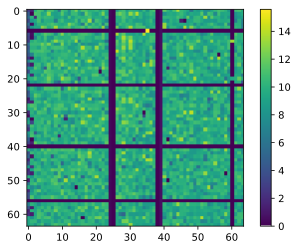

In [148]:
plt.imshow(GSingleRead*1e6)
plt.colorbar()

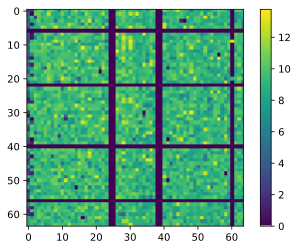

In [149]:
plt.imshow(GSingleReadPIC*1e6)
plt.colorbar()

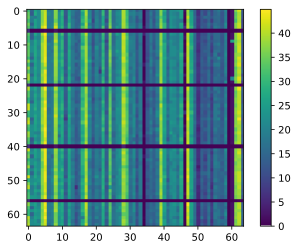

In [150]:
plt.imshow(GMultiply*1e6)
plt.colorbar()

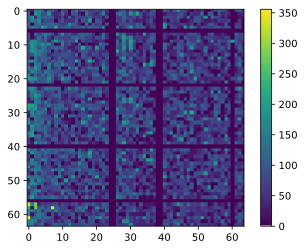

In [151]:
plt.imshow(GBatch * 1e6)
plt.colorbar()

[autoreload of dut_a0 failed: Traceback (most recent call last):
  File "c:\users\localuser\.venvs\py37\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\localuser\.venvs\py37\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\localuser\AppData\Local\Programs\Python\Python37\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\localuser\AppData\Local\Programs\Python\Python37\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frame

Running <function DPE.read at 0x0000021FC6FB8288> with serial
[INFO] Elapsed time = 0.27s
Serial disconnected


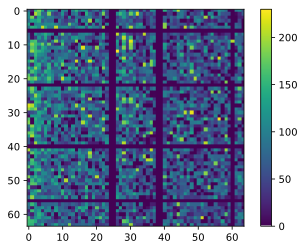

In [160]:
GBatch3 = dpe.read(2)
plt.imshow(GBatch3 * 1e6)
plt.colorbar()

In [166]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

Setting vrefs to default


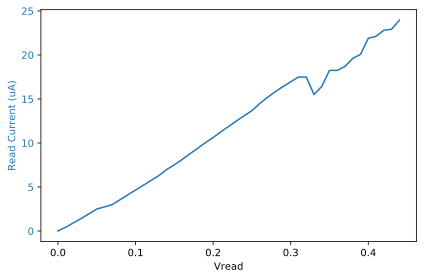

In [180]:
arr=1
rr=12
cc=10

Vreads = np.arange(0, 0.45, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [172]:
zeroMatrix = np.zeros((64,64))
ts = time.time()
a0.pic_write_batch(zeroMatrix, zeroMatrix, array=2, mode=1)
print(time.time() - ts)

0.43001294136047363


In [169]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


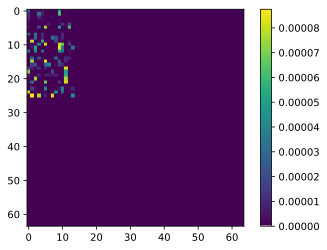

In [176]:
array = 1
Vread = 0.2
gain = -1
Gmap = a0.pic_read_batch(array, Vread=Vread, gain=gain) / Vread
plt.imshow(Gmap)
plt.colorbar()

In [182]:
arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
print(time.time() - ts)
#plt.imshow(Gmap1)
#plt.colorbar()

76.67740535736084


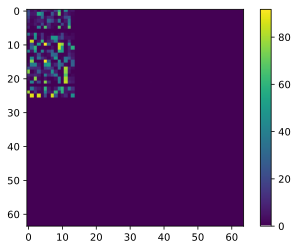

In [183]:
plt.imshow(Gmap1)
plt.colorbar()

In [189]:
vSetRamp = np.arange(0.4, 3.3, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.08)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
print(76.677*np.size(vSetRamp)*np.size(vGateSetRamp) /3600 )
print(76.677*np.size(vResetRamp)*np.size(vGateResetRamp) /3600 )

6.176758333333334
0.31948750000000004


Now turning ON
Set, Vgate =  0.5
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target Conductance
1770  are still too far below target

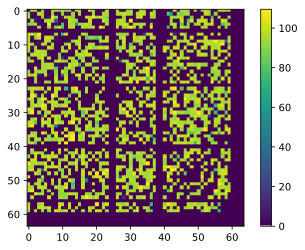

In [216]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

vSetRamp = np.arange(0.4, 3.6, 0.1)
vGateSetRamp = np.arange(0.5, 1.4, 0.075)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

finalGM = a0.hybrid_array_program(targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)

time.sleep(15)
arr = 1
numRows = 64
numCols = 64
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='Prober2_Arr1_Hopfield60_After')